# Loan Default Risk Analysis: Lending Club Case Study
Exploring Data to Identify Factors Influencing Loan Defaults
### Introduction
This analysis focuses on understanding the patterns and key factors associated with loan defaults using Lending Club's historical data. By conducting a detailed Exploratory Data Analysis (EDA), we aim to provide actionable insights that can minimize financial risks and optimize lending decisions.

### Objective
To uncover significant variables influencing loan repayment behavior, enabling the identification of high-risk applicants and aiding in reducing credit losses.

### Dataset Overview
The dataset consists of historical loan data spanning 2007–2011, capturing key attributes such as loan amount, term, interest rate, employment length, credit grade, and the repayment outcome (e.g., fully paid or charged-off).

# Section 1: Importing Necessary Libraries
### Importing required libraries for data manipulation, visualization, and analysis


In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

print('Packages imported successfully')

Packages imported successfully



# Section 2: Loading the Dataset
### Load the loan dataset and display its structure to understand its contents

In [525]:
df=pd.read_csv("loan.csv")
print('Data loaded successfully')
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')


Data loaded successfully
The dataset contains 39717 rows and 111 columns.


# Section 3: Initial Data Exploration
### Checking the first few rows, data types, and basic statistics of the dataset


In [526]:
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [527]:
print(df.tail())

          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN       

In [528]:
print(df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

# Section 4: Data Cleaning
This section focuses on preparing the dataset for analysis by:
- Removing irrelevant and duplicate columns.
- Handling missing and inconsistent values.
- Converting categorical data into numerical or structured formats.



In [529]:
# Count the total number of missing values in each column
# This helps identify which columns have missing data and sorts them in descending order
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [530]:
print(f"Number of columns before cleaning: {df.shape[1]}")

#Calculate the percentage of missing values for each column
# Divide the number of missing values in a column by the total number of rows in the DataFrame
missing_perc = df.isna().sum() / len(df) * 100

# Filter the column names where missing values > 40%
columns_with_high_missing = missing_perc[missing_perc > 40].index.tolist()

# Display the result
print("Columns with more than 40% missing values:")
print(f"Number of columns to drop: {len(columns_with_high_missing)}")


Number of columns before cleaning: 111
Columns with more than 40% missing values:
Number of columns to drop: 57


In [531]:
# Dropping all the columns as these columns will not help in any analysis for the case study
df.drop(columns=columns_with_high_missing, axis=1, inplace=True)
print(f"Number of columns after cleaning: {df.shape[1]}")

Number of columns after cleaning: 54


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [533]:
### These columns are either not required for analysis or duplicate because similar value can be derived from a different column

extra_columns_to_be_deleted = ['member_id','url', 'collection_recovery_fee','desc', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'title', 'emp_title', 'zip_code', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',  'revol_bal', 'revol_util', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',  'last_credit_pull_d', 'collections_12_mths_ex_med','tax_liens', 'chargeoff_within_12_mths', 'sub_grade', 'pymnt_plan','issue_d', 'policy_code','total_acc']

df.drop(columns=extra_columns_to_be_deleted, axis=1, inplace=True)


In [534]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

### Checking 'na' values again to see if any data can be corrected

In [535]:
df.isna().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
pub_rec                    0
application_type           0
acc_now_delinq             0
delinq_amnt                0
pub_rec_bankruptcies     697
dtype: int64

### Starting with emp_length column first as it is of type Object

In [536]:
df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [537]:
test_length = len(df['emp_length'])
test_length

39717

In [538]:
### First deleting the rows with NA values
df1 = df.dropna(subset='emp_length')

In [539]:
df1.isna().sum()


id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
pub_rec                   0
application_type          0
acc_now_delinq            0
delinq_amnt               0
pub_rec_bankruptcies    697
dtype: int64

In [540]:
### method to clean up the employee length values
### Convert the values into meaningful data by removing extra string values and symbols
def refactor_emp_length(emp_length):

    if emp_length == '< 1 year':
        return 0
    elif emp_length == '10+ years':
        return 10
    else:
        return int(emp_length.split()[0])

## Saving the data into a new Data Frame
df1['emp_length'] = df1['emp_length'].apply(refactor_emp_length)

In [541]:
df1['emp_length']

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38642, dtype: int64

In [542]:
df1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'pub_rec', 'application_type', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [543]:
df1.isna().sum()

id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
pub_rec                   0
application_type          0
acc_now_delinq            0
delinq_amnt               0
pub_rec_bankruptcies    697
dtype: int64

### Checking if there any unique values in pub_rec_bankruptcies

In [544]:
print(df1['pub_rec_bankruptcies'].unique())


[ 0.  1.  2. nan]


In [545]:
### Replacing the missing values with 0 which means that there is no bankruptcy
df1['pub_rec_bankruptcies'].fillna(0, inplace=True)


In [546]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   funded_amnt_inv       38642 non-null  float64
 4   term                  38642 non-null  object 
 5   int_rate              38642 non-null  object 
 6   installment           38642 non-null  float64
 7   grade                 38642 non-null  object 
 8   emp_length            38642 non-null  int64  
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  loan_status           38642 non-null  object 
 13  purpose               38642 non-null  object 
 14  addr_state            38642 non-null  object 
 15  dti                   38

### Converting the values of term column


In [547]:
df1['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38642, dtype: object

In [548]:
### term column is of type Object. We are extracting only the int value
df1['term'] = df1['term'].str.extract('(\d+)').astype(int)

In [549]:
df1['term']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38642, dtype: int64

### Converting the int_rate column to float


In [550]:
df1['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38642, dtype: object

In [551]:
df1['int_rate'] = df1['int_rate'].str.rstrip('%').astype(float)

In [552]:
df1['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38642, dtype: float64

### Checking home_ownership values and removing any unwanted rows

In [553]:
df1['home_ownership'].value_counts()

home_ownership
RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: count, dtype: int64

In [554]:
### Removing the rows with value as NONE
df1 = df1.loc[df1['home_ownership']!='NONE']


In [555]:
df1['home_ownership'].value_counts()

home_ownership
RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
Name: count, dtype: int64

In [556]:
df1['home_ownership'] = df1['home_ownership'].astype(str)
print(df1['home_ownership'].dtype)

object


### Working on loan_status column and removing the rows with the status as "Current"


In [557]:
df1['loan_status'].value_counts()

loan_status
Fully Paid     32142
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [558]:
### Assigning to a new data frame and Check unique values in loan_status
print("Unique loan_status values:", df1['loan_status'].unique())

# Filter out 'Current' if applicable
df_latest = df1.loc[df1['loan_status'] != 'Current']

status_mapping = {'Fully Paid': 1, 'Charged Off': 0}
df_latest['loan_status'] = df_latest['loan_status'].map(status_mapping)

# Check for null values after mapping
print("Rows after filtering:", df_latest.shape)
print("Null values in loan_status after mapping:", df_latest['loan_status'].isna().sum())


Unique loan_status values: ['Fully Paid' 'Charged Off' 'Current']
Rows after filtering: (37541, 22)
Null values in loan_status after mapping: 0


In [559]:
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37541 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37541 non-null  int64  
 1   loan_amnt             37541 non-null  int64  
 2   funded_amnt           37541 non-null  int64  
 3   funded_amnt_inv       37541 non-null  float64
 4   term                  37541 non-null  int64  
 5   int_rate              37541 non-null  float64
 6   installment           37541 non-null  float64
 7   grade                 37541 non-null  object 
 8   emp_length            37541 non-null  int64  
 9   home_ownership        37541 non-null  object 
 10  annual_inc            37541 non-null  float64
 11  verification_status   37541 non-null  object 
 12  loan_status           37541 non-null  int64  
 13  purpose               37541 non-null  object 
 14  addr_state            37541 non-null  object 
 15  dti                   37

### Finding Outliers in the data

In [561]:
# Identifying outliers in numerical columns using IQR
numerical_cols = ['loan_amnt', 'annual_inc', 'installment']
outlier_summary = {}

for col in numerical_cols:
    Q1 = df_latest[col].quantile(0.25)
    Q3 = df_latest[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_latest[(df1[col] < lower_bound) | (df_latest[col] > upper_bound)]
    outlier_summary[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }
print("Outlier Summary:")
print(outlier_summary)


Outlier Summary:
{'loan_amnt': {'Lower Bound': np.float64(-8750.0), 'Upper Bound': np.float64(29250.0), 'Outliers Count': 1078}, 'annual_inc': {'Lower Bound': np.float64(-22000.0), 'Upper Bound': np.float64(146000.0), 'Outliers Count': 1730}, 'installment': {'Lower Bound': np.float64(-225.11), 'Upper Bound': np.float64(821.53), 'Outliers Count': 1244}}


### Dealing with the Outliers

In [562]:
# Capping outliers at the upper bound
for col in numerical_cols:
    upper_bound = outlier_summary[col]["Upper Bound"]
    df_latest[col] = np.where(df_latest[col] > upper_bound, upper_bound, df_latest[col])


### Calculating Loan-to-Income Ratio

In [563]:
# Calculating Loan-to-Income Ratio
df_latest['LTI'] = df_latest['loan_amnt'] / df_latest['annual_inc']


### Expanding the grouping concept for other critical variables

In [564]:
# Grouping data for deeper insights
grouped_data = df_latest.groupby(['term', 'grade', 'verification_status']).agg({
    'loan_amnt': ['mean', 'max'],
    'int_rate': ['mean', 'max'],
    'LTI': ['mean', 'max']
}).reset_index()
print("Grouped Data Summary:")
print(grouped_data)


Grouped Data Summary:
   term grade verification_status     loan_amnt            int_rate         \
                                           mean      max       mean    max   
0    36     A        Not Verified   7171.452386  29250.0   7.407254   9.63   
1    36     A     Source Verified   8578.110551  29250.0   7.187722   9.63   
2    36     A            Verified  11842.110900  29250.0   7.385688   9.63   
3    36     B        Not Verified   8740.346154  25000.0  10.993589  12.69   
4    36     B     Source Verified   8822.906121  29250.0  10.953212  12.69   
5    36     B            Verified  13690.470140  29250.0  11.068640  12.69   
6    36     C        Not Verified   8165.593368  29250.0  13.283222  16.11   
7    36     C     Source Verified   8256.688018  29250.0  13.704755  15.96   
8    36     C            Verified  12360.250174  29250.0  13.596525  16.11   
9    36     D        Not Verified   8971.029610  25000.0  15.066729  18.49   
10   36     D     Source Verified   9283.7

### Adding a new column installment_to_income_ratio

In [565]:
df_latest['installment_to_income_ratio'] = df_latest['installment'] / df_latest['annual_inc']

### Creating different Subsets of data for in-depth analysis

In [582]:
# Creating subsets for different loan statuses to explore patterns
df_charged_off = df_latest[df_latest['loan_status'] == 0]
df_fully_paid = df_latest[df_latest['loan_status'] == 1]

# Validate the subsets
print(f"Charged Off Loans: {df_charged_off.shape[0]} rows")
print(f"Fully Paid Loans: {df_fully_paid.shape[0]} rows")


Charged Off Loans: 5399 rows
Fully Paid Loans: 32142 rows


### Summary of Data Cleaning

#### Missing Values Handling:

- Identified and dropped 57 columns with more than 40% missing values to focus on reliable and meaningful data.
- Replaced missing values in pub_rec_bankruptcies with 0, interpreting the absence of values as no bankruptcies.

#### Categorical Data Transformation:

- Converted the term column from object format (e.g., "36 months") to integer values for consistency.
- Cleaned and standardized the emp_length column by removing extraneous text (e.g., "10+ years") and converting it into numerical values.
- Reformatted the int_rate column by removing percentage signs and converting it into a float.

#### Outlier Detection and Treatment:

- Identified outliers in loan_amnt and annual_inc using the Interquartile Range (IQR) method.
Capped extreme values in annual_inc at the upper bound (e.g., 145,000 for the overall dataset and 132,000 for charged-off loans) to reduce the impact of outliers.

#### Irrelevant Values Removal:

- Removed rows with invalid or unnecessary values in the home_ownership column (e.g., entries labeled as "NONE").
- Excluded rows with loan_status labeled as "Current," as these loans are still active and do not provide insights into defaults or repayments.

#### New Feature Engineering:

- Created a new column, Loan-to-Income Ratio (LTI), by dividing loan_amnt by annual_inc to provide insights into the borrower's financial risk.
- Created another column, installment_to_income_ratio
- Generated subsets of data for specific analyses (e.g., a dataset for loans that are "Charged Off").

#### Grouping and Aggregation:

- Grouped data by features such as LTI, term, installment, and verification_status to gain deeper insights into loan trends and borrower profiles.

#### Feature Selection:

- Removed redundant or non-informative columns (e.g., member_id, desc, zip_code) that do not contribute to meaningful analysis.

#### Final Dataset:

- The cleaned dataset now contains 37541 rows and 21 columns, making it ready for exploratory data analysis, visualization, and modeling.

### Section 5: Analysis

1. Numerical Variables

The following columns are numerical in the dataset:

- loan_amnt (Loan Amount)
- funded_amnt (Funded Amount)
- funded_amnt_inv (Funded Amount by Investors)
- int_rate (Interest Rate)
- installment (Monthly Installment)
- annual_inc (Annual Income)
- dti (Debt-to-Income Ratio)
- emp_length (Employment Length in Years)
- pub_rec_bankruptcies (Public Records of Bankruptcies)
- LTI (Loan-to-Income Ratio)
- installment_to_income_ratio (Ratio of Monthly Installment to Income)
2. Categorical Variables

The following columns are categorical in the dataset:

- term (Loan Term: 36 or 60 months)
- grade (Loan Grade)
- home_ownership (Home Ownership Status)
- verification_status (Verification Status)
- loan_status (Loan Status: Fully Paid or Charged Off)
- purpose (Purpose of Loan)
- addr_state (State of Borrower)

### Univariant Analysis

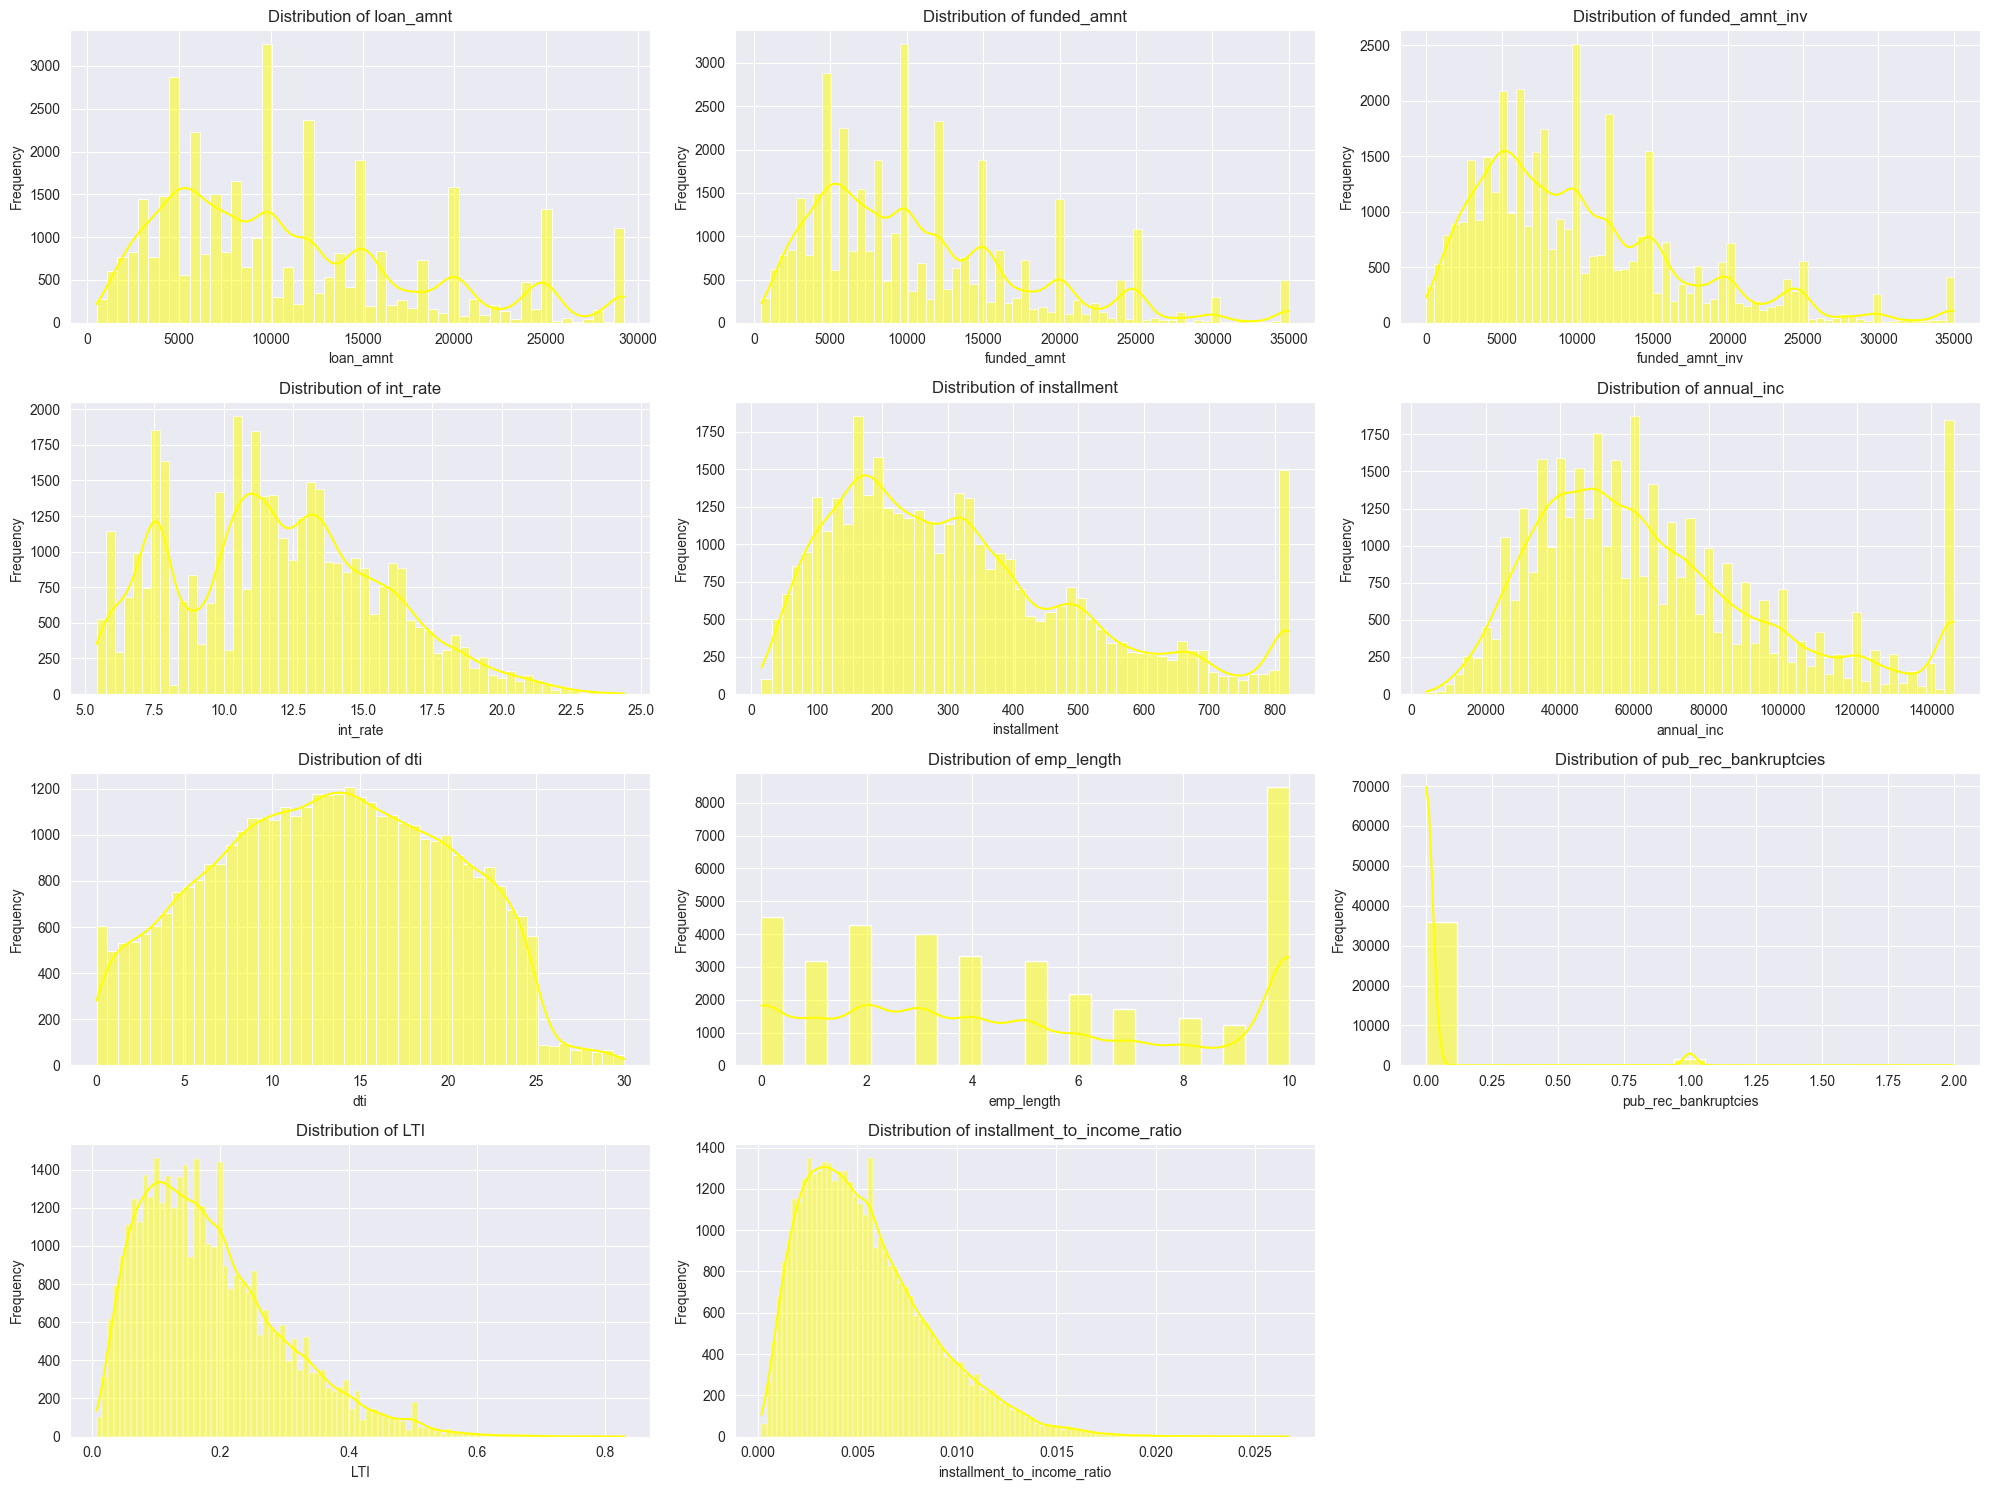

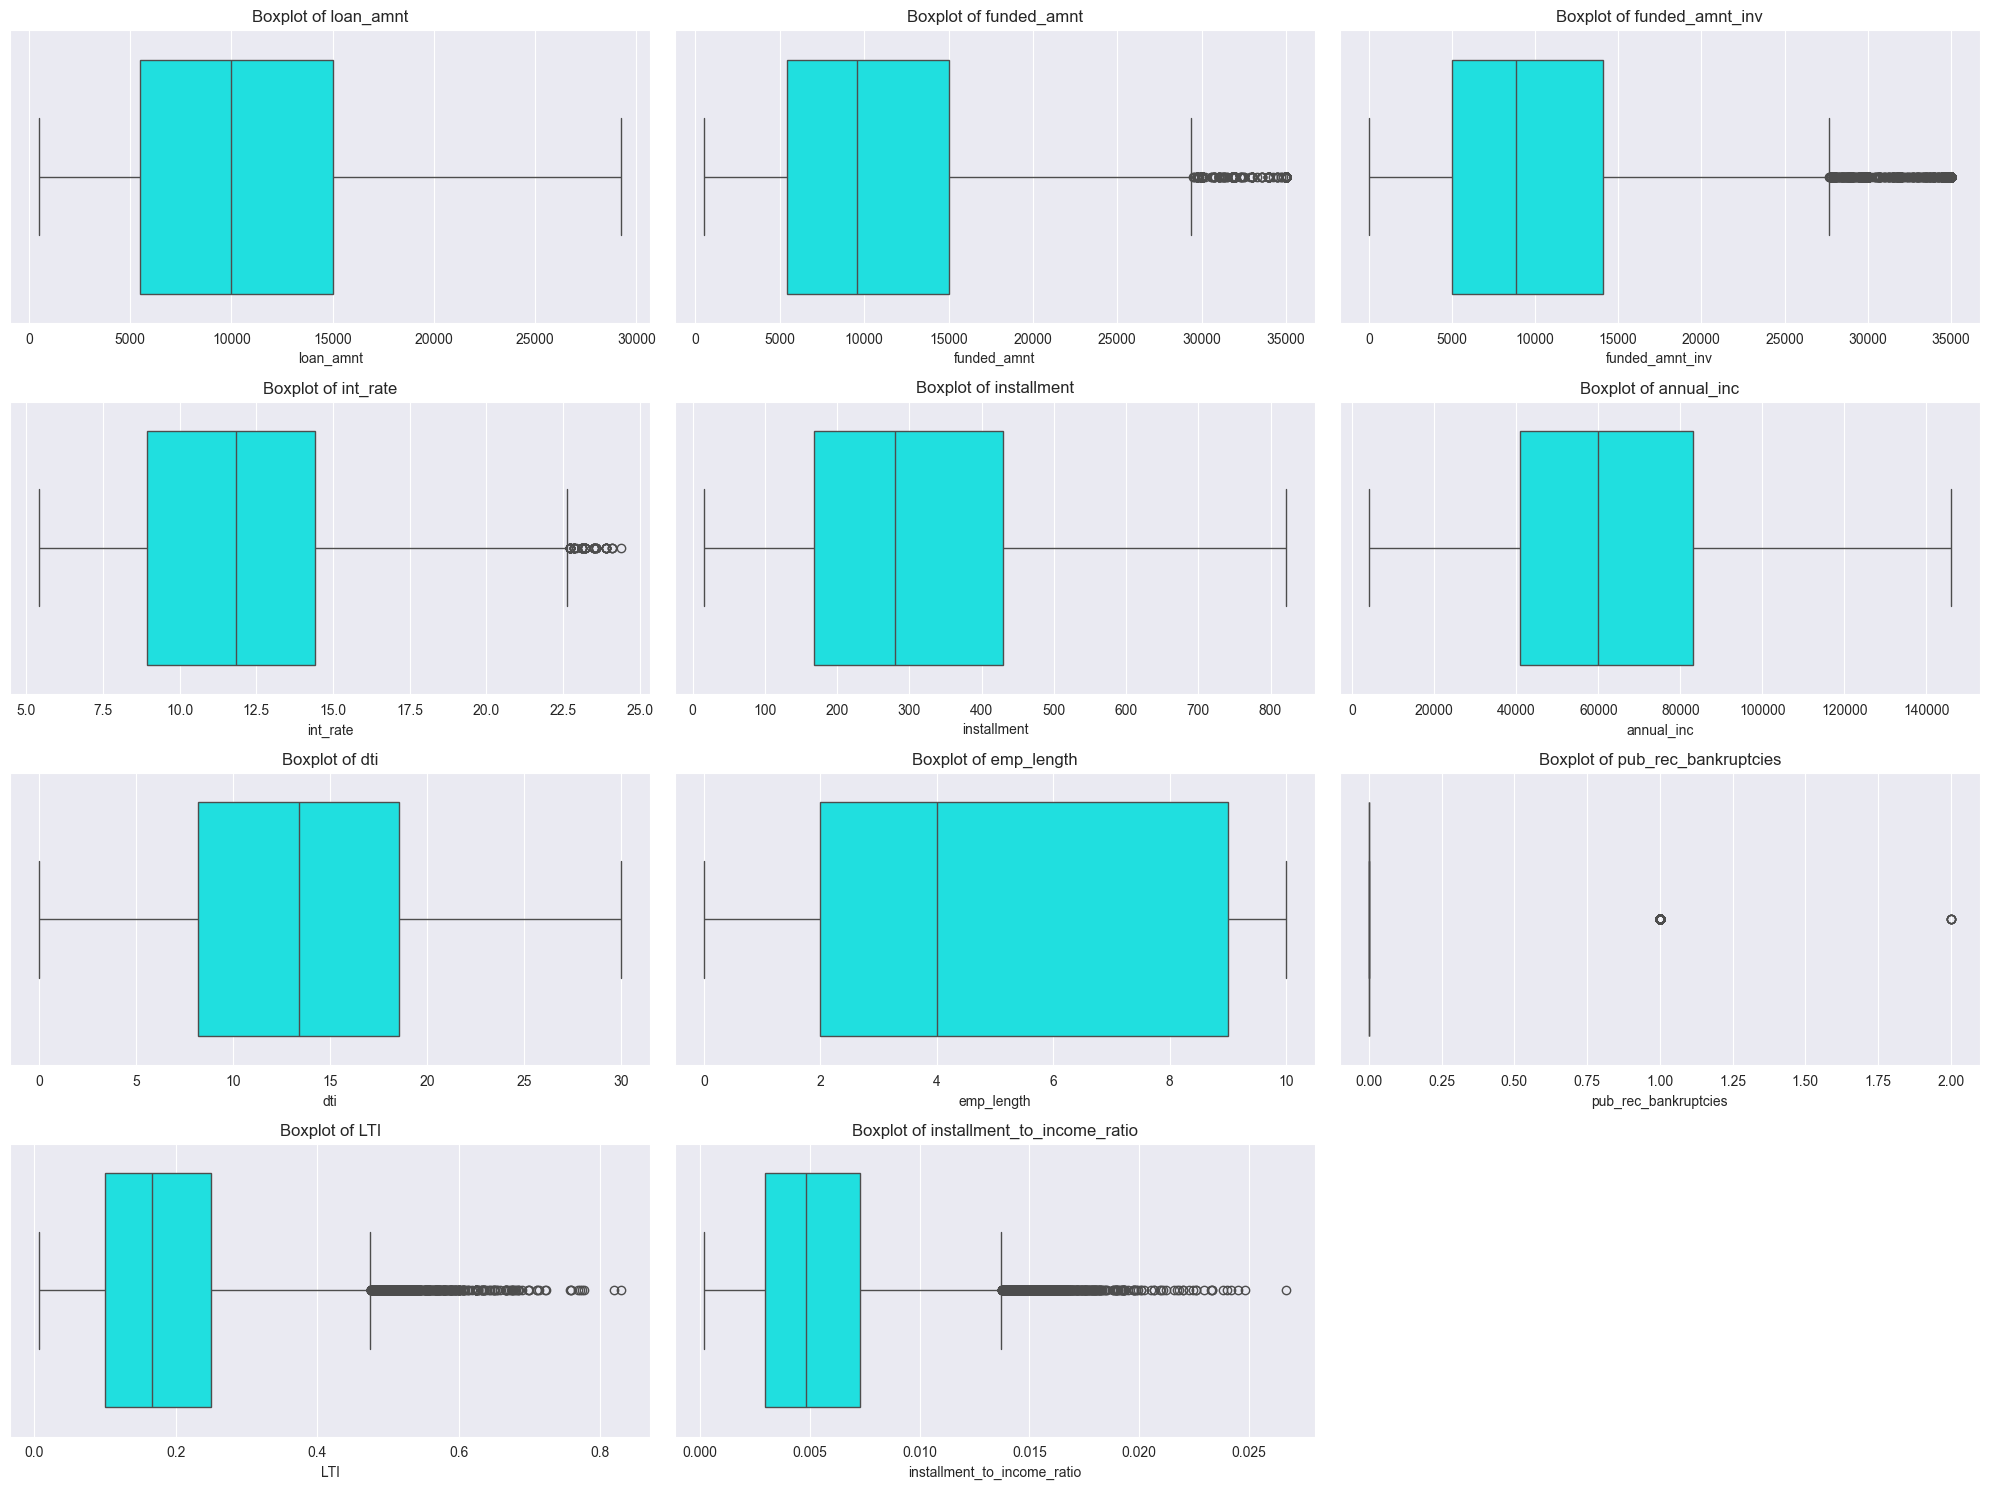

In [575]:
# List of numerical columns
numerical_cols = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
    'annual_inc', 'dti', 'emp_length', 'pub_rec_bankruptcies', 'LTI',
    'installment_to_income_ratio'
]

# Creating grouped histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Adjust grid size (4x3) based on the number of variables
    sns.histplot(df_latest[col], kde=True, color='yellow')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Creating grouped box plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_latest, x=col, color='cyan')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()



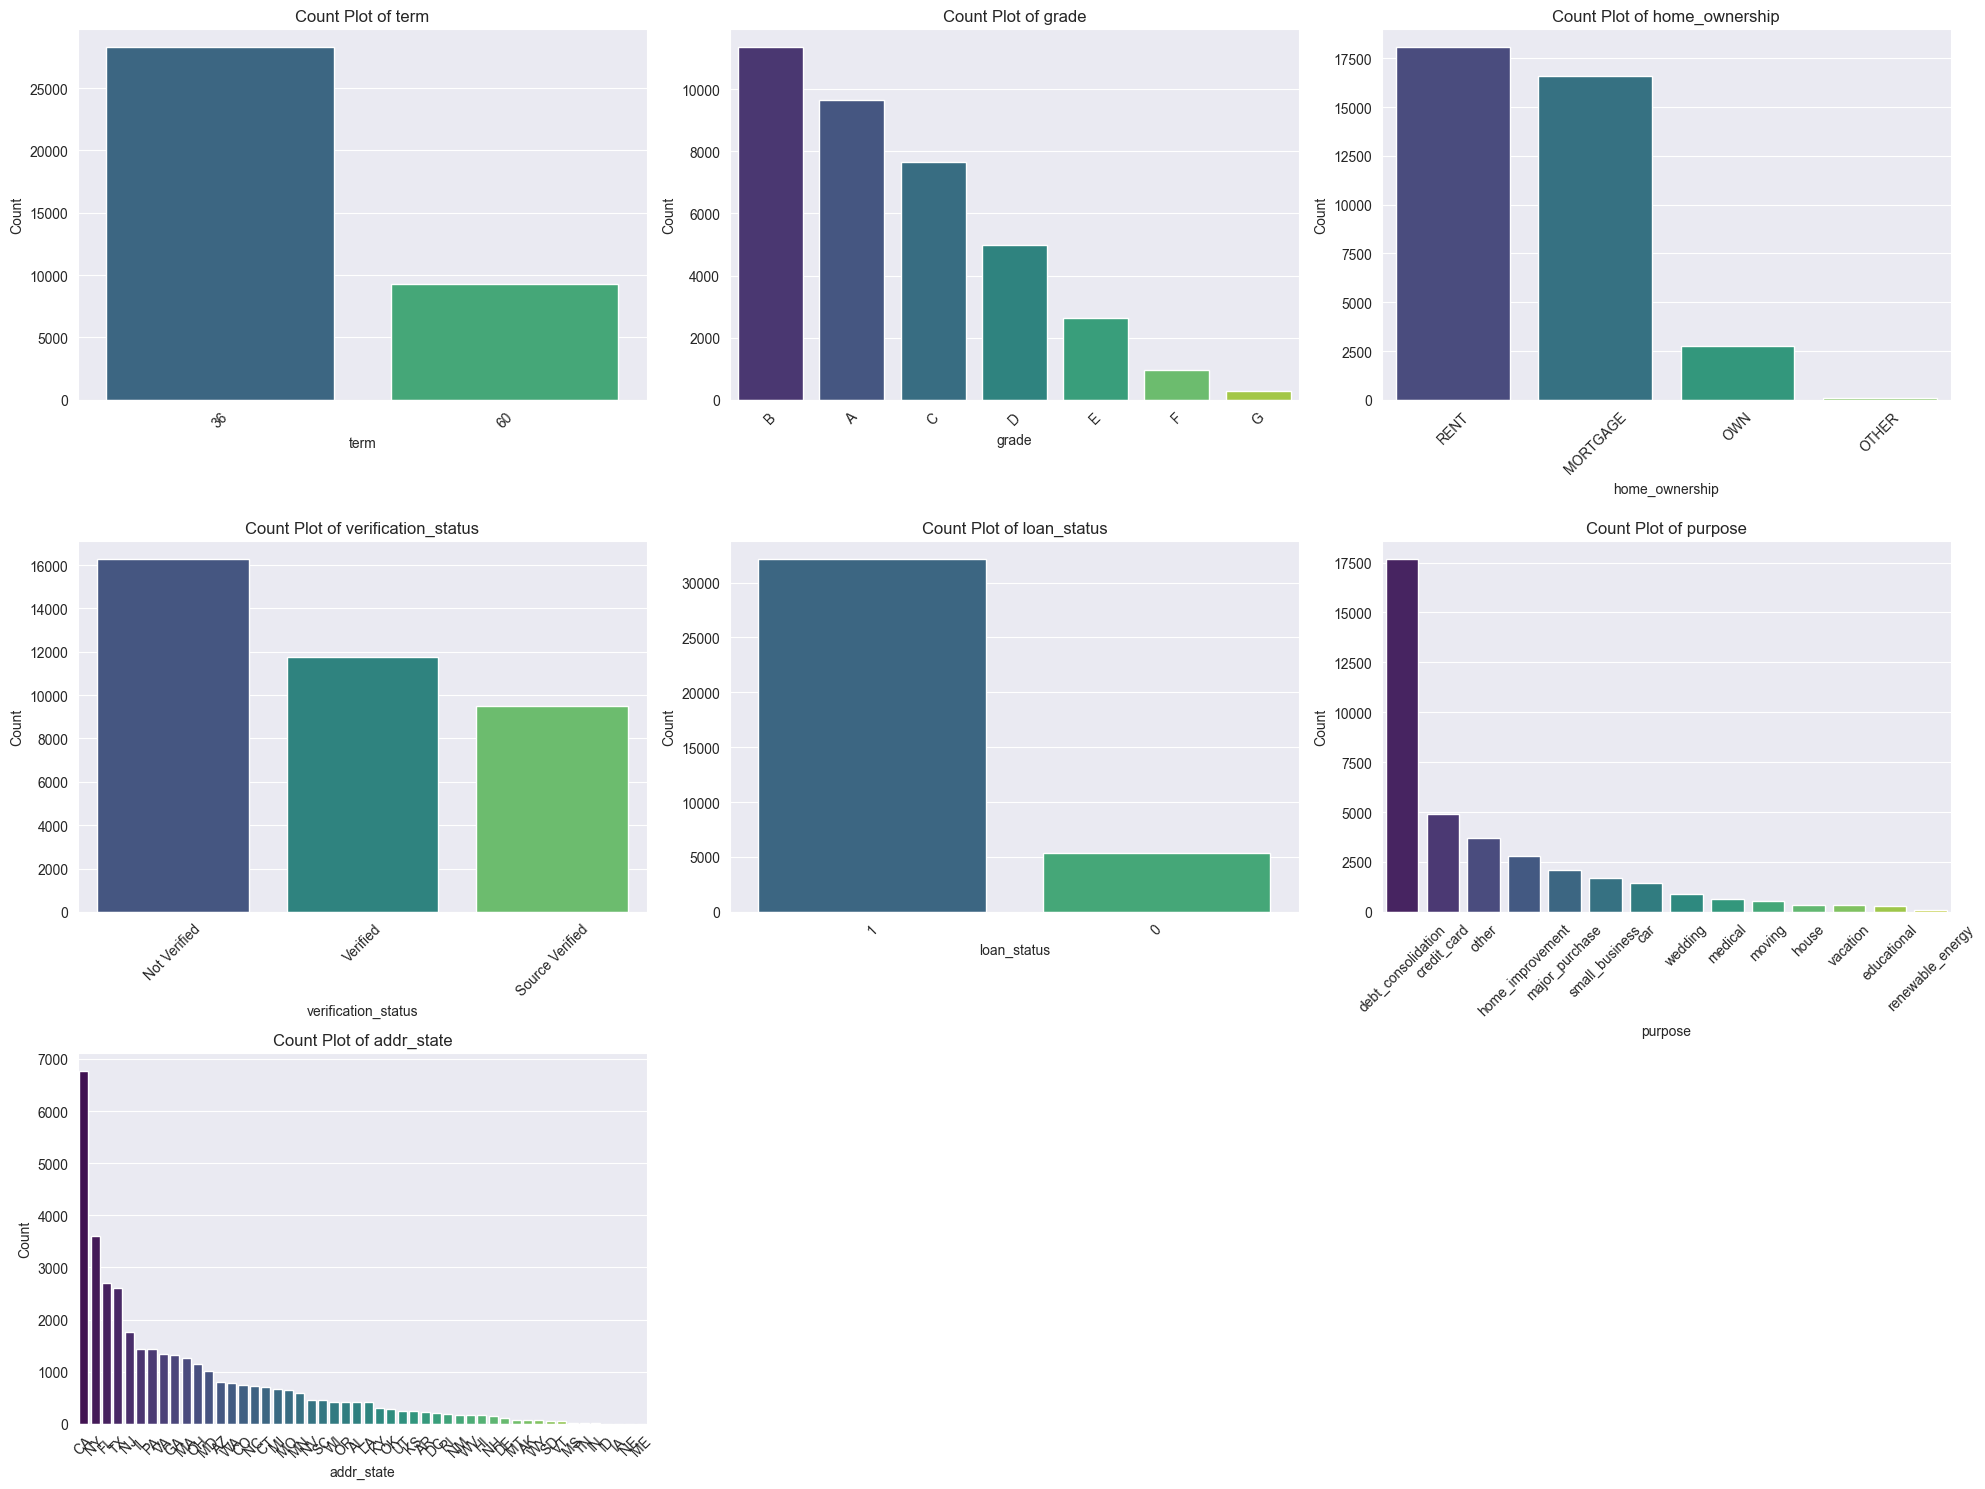

In [570]:
# List of categorical columns
categorical_cols = [
    'term', 'grade', 'home_ownership', 'verification_status',
    'loan_status', 'purpose', 'addr_state'
]

# Creating grouped bar charts
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_latest, x=col, palette='viridis', order=df_latest[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


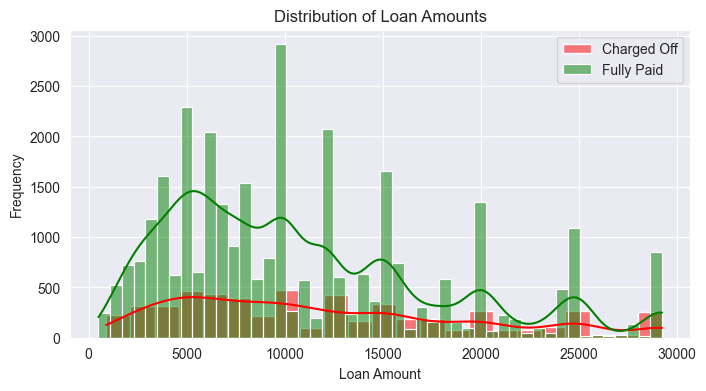

In [583]:
# Loan Amount Distribution for Subsets
plt.figure(figsize=(8, 4))
sns.histplot(df_charged_off['loan_amnt'], kde=True, color='red', label='Charged Off')
sns.histplot(df_fully_paid['loan_amnt'], kde=True, color='green', label='Fully Paid')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


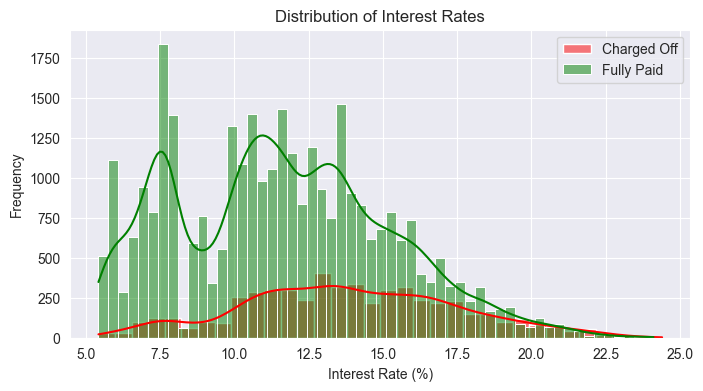

In [584]:
# Interest Rate Distribution for Subsets
plt.figure(figsize=(8, 4))
sns.histplot(df_charged_off['int_rate'], kde=True, color='red', label='Charged Off')
sns.histplot(df_fully_paid['int_rate'], kde=True, color='green', label='Fully Paid')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


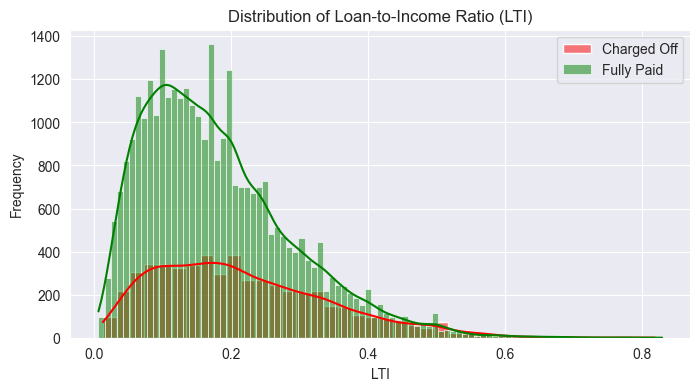

In [585]:
# Loan-to-Income Ratio (LTI) Distribution for Subsets
plt.figure(figsize=(8, 4))
sns.histplot(df_charged_off['LTI'], kde=True, color='red', label='Charged Off')
sns.histplot(df_fully_paid['LTI'], kde=True, color='green', label='Fully Paid')
plt.title('Distribution of Loan-to-Income Ratio (LTI)')
plt.xlabel('LTI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


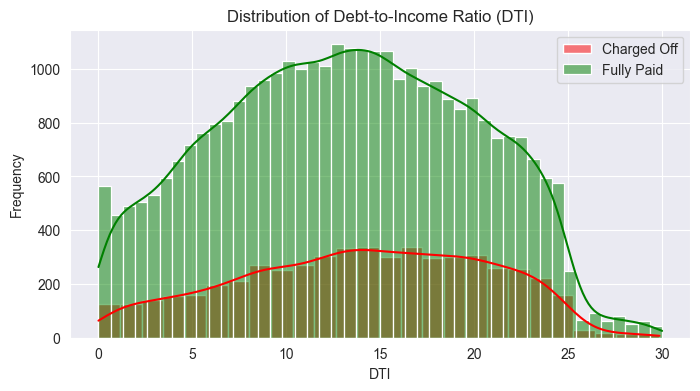

In [586]:
# DTI Distribution for Subsets
plt.figure(figsize=(8, 4))
sns.histplot(df_charged_off['dti'], kde=True, color='red', label='Charged Off')
sns.histplot(df_fully_paid['dti'], kde=True, color='green', label='Fully Paid')
plt.title('Distribution of Debt-to-Income Ratio (DTI)')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


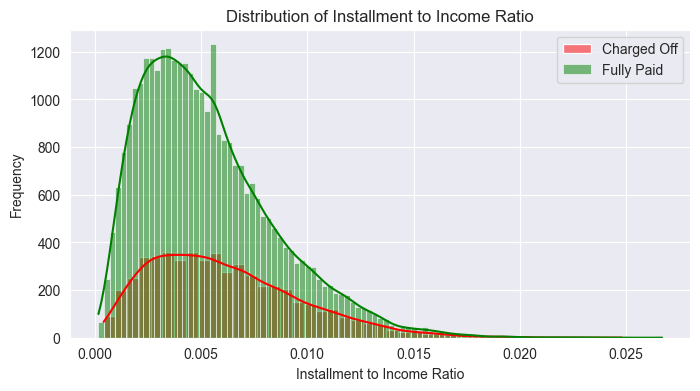

In [587]:
# Installment to Income Ratio Distribution for Subsets
plt.figure(figsize=(8, 4))
sns.histplot(df_charged_off['installment_to_income_ratio'], kde=True, color='red', label='Charged Off')
sns.histplot(df_fully_paid['installment_to_income_ratio'], kde=True, color='green', label='Fully Paid')
plt.title('Distribution of Installment to Income Ratio')
plt.xlabel('Installment to Income Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()


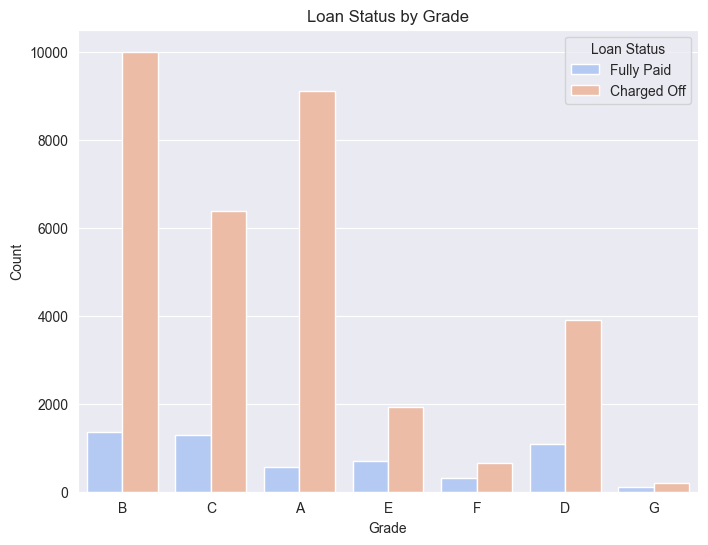

In [588]:
# Loan Status by Grade
plt.figure(figsize=(8, 6))
sns.countplot(data=df_latest, x='grade', hue='loan_status', palette='coolwarm')
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(['Fully Paid', 'Charged Off'], title='Loan Status')
plt.show()


### Univariate Analysis for Numeric Values

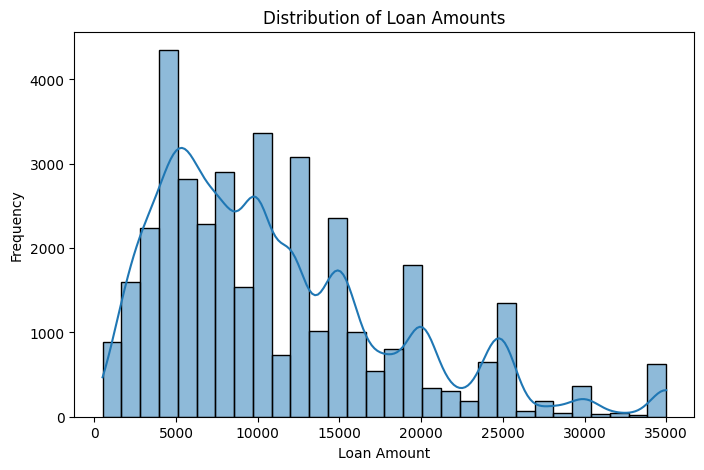

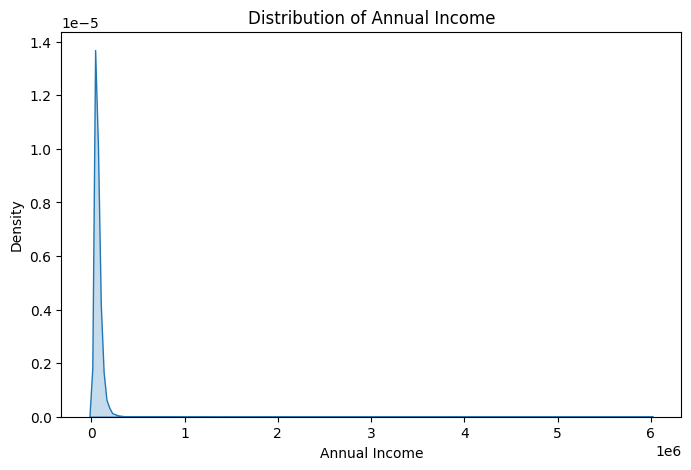

In [434]:
# Histogram and KDE for loan_amnt
plt.figure(figsize=(8, 5))
sns.histplot(data=df_latest, x='loan_amnt', kde=True, bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# KDE plot for annual_inc
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_latest, x='annual_inc', shade=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()


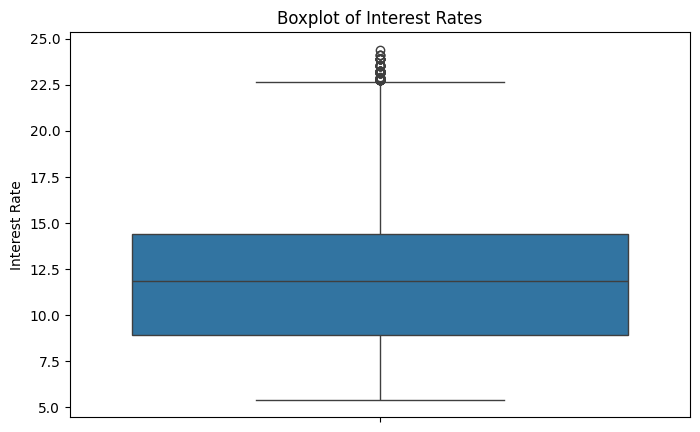

In [435]:
# Boxplot for interest rates
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_latest, y='int_rate')
plt.title('Boxplot of Interest Rates')
plt.ylabel('Interest Rate')
plt.show()


### Univariate Analysis for Categorical Variables


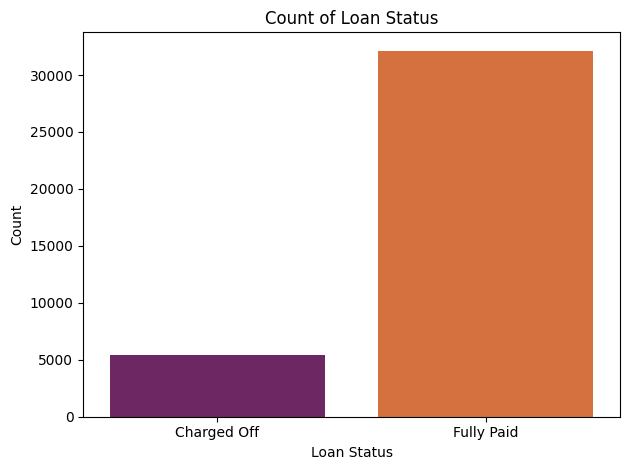

In [436]:
### Analyze categorical variables like grade, home_ownership, and loan_status.

# Count plot for loan_status
sns.countplot(data=df_latest, x='loan_status', palette='inferno')
plt.xticks([0, 1], ['Charged Off', 'Fully Paid'])
plt.title('Count of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


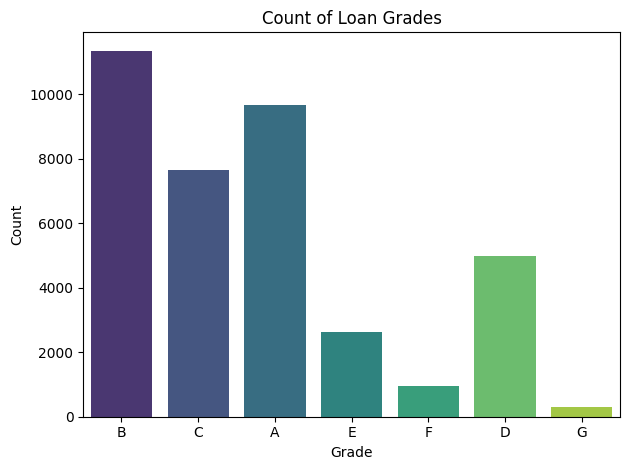

In [437]:
# Count plot for grade
sns.countplot(data=df_latest, x='grade', palette='viridis')
plt.title('Count of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

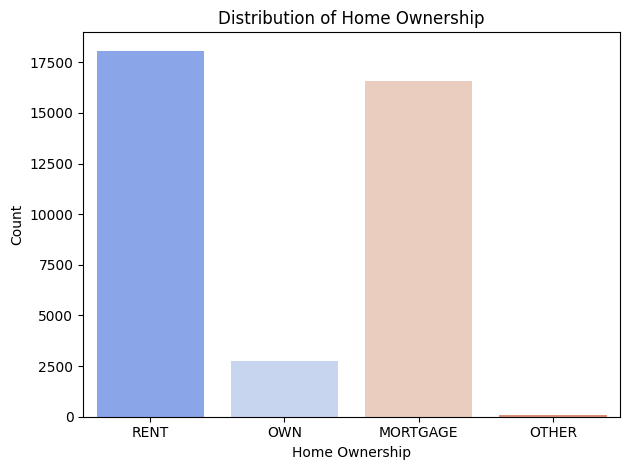

In [438]:
# Count plot for home_ownership
sns.countplot(data=df_latest, x='home_ownership', palette='coolwarm')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

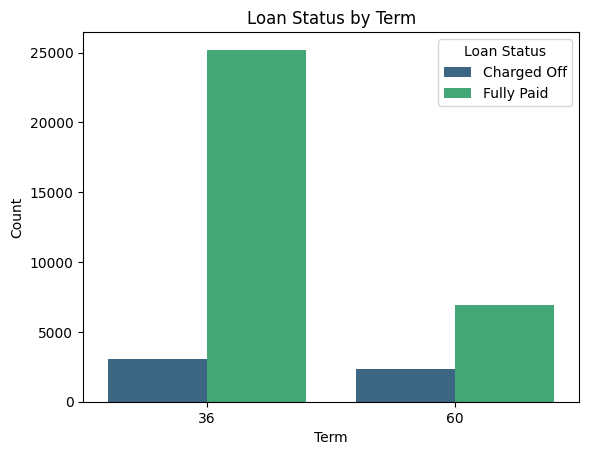

In [439]:
# Count plot for Loan Status by Term
sns.countplot(data=df_latest, x='term', hue='loan_status', palette='viridis')
plt.title('Loan Status by Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(['Charged Off', 'Fully Paid'], title='Loan Status')
plt.show()


### Summary Statistics

In [440]:
# Summary statistics for numerical columns
print(df_latest[['loan_amnt', 'int_rate', 'annual_inc', 'installment']].describe())


          loan_amnt      int_rate    annual_inc   installment
count  37541.000000  37541.000000  3.754100e+04  37541.000000
mean   11119.771050     11.963580  6.940618e+04    324.662009
std     7354.173376      3.683037  6.467839e+04    208.903386
min      500.000000      5.420000  4.000000e+03     15.690000
25%     5500.000000      8.940000  4.100000e+04    167.380000
50%    10000.000000     11.830000  6.000000e+04    280.000000
75%    15000.000000     14.420000  8.300000e+04    429.040000
max    35000.000000     24.400000  6.000000e+06   1305.190000


### Bivariate Analysis

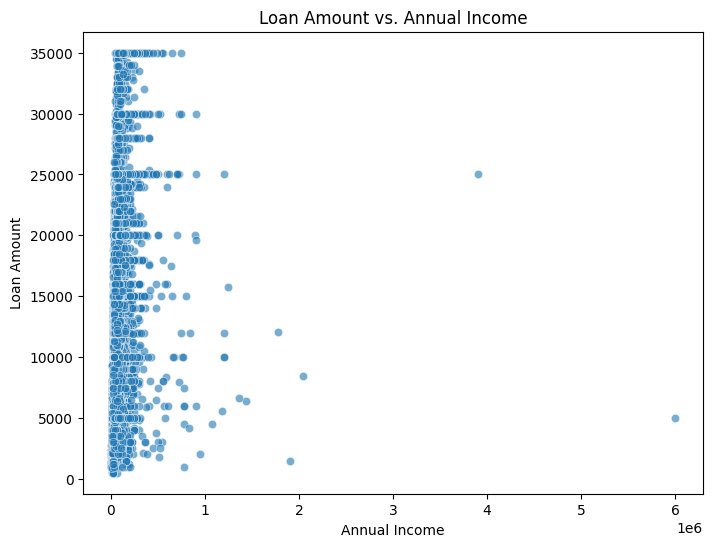

In [441]:
### Analyze relationships between two continuous variables like loan_amnt, int_rate, annual_inc

# Scatter plot between loan amount and annual income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_latest, x='annual_inc', y='loan_amnt', alpha=0.6)
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()


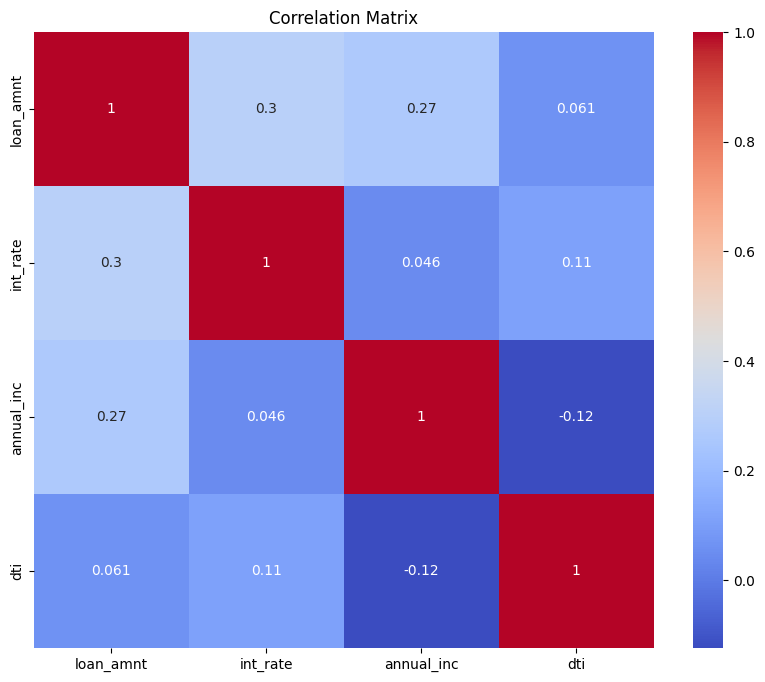

In [442]:
### Check correlations between numerical variables to identify strong relationships:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_latest[['loan_amnt', 'int_rate', 'annual_inc', 'dti']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




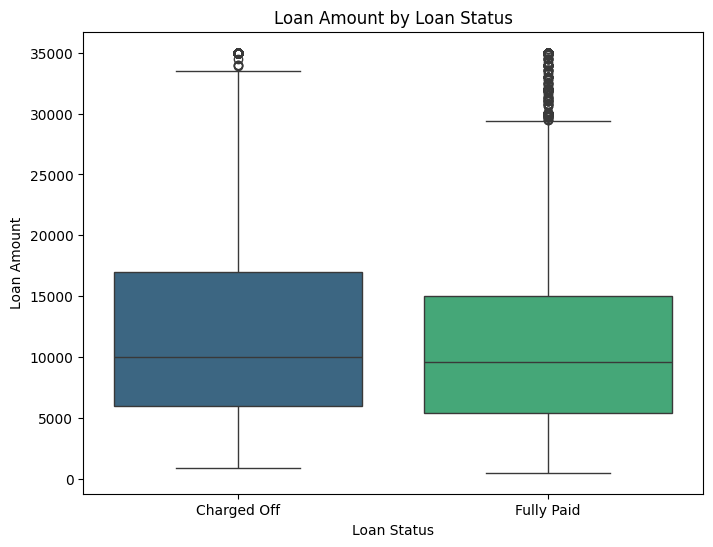

In [443]:
### Analyze how numerical variables like loan_amnt, int_rate, vary across categories like loan_status, grade, or home_ownership

# Boxplot of loan amount by loan status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_latest, x='loan_status', y='loan_amnt', palette='viridis')
plt.xticks([0, 1], ['Charged Off', 'Fully Paid'])
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


### Multivariate Analysis

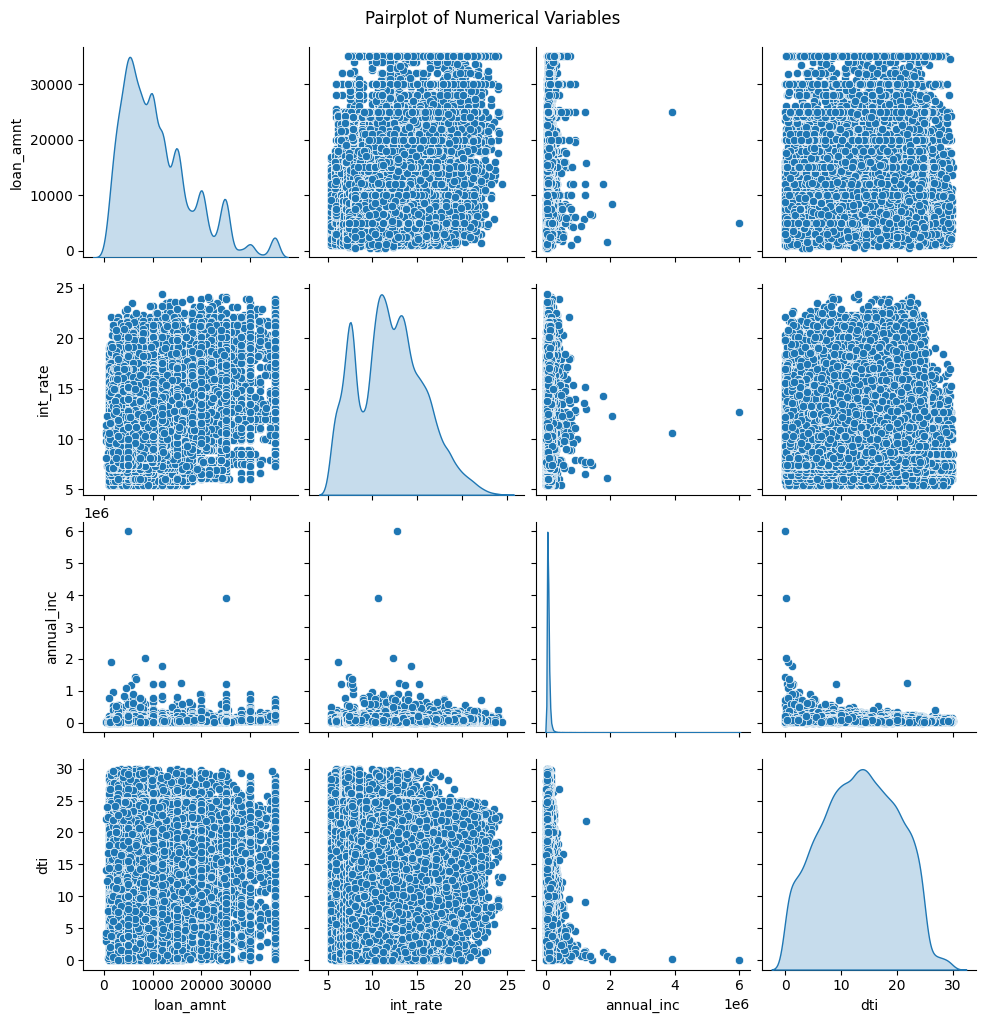

In [444]:
### A pairplot and correlation heatmap can help explore relationships among multiple numerical variables like loan_amnt, annual_inc, int_rate, and dt

# Pairplot to analyze relationships between numerical variables
sns.pairplot(df_latest[['loan_amnt', 'int_rate', 'annual_inc', 'dti']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


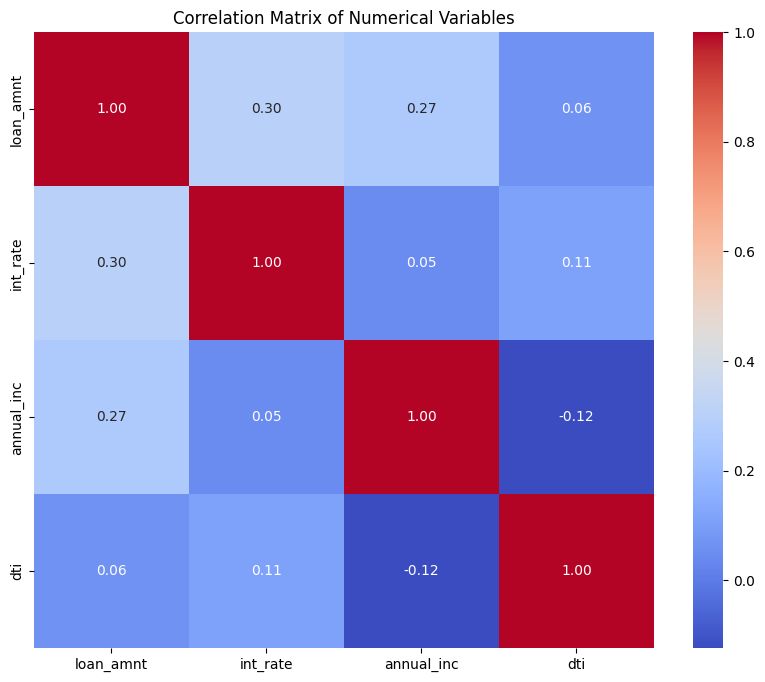

In [445]:
### Understand correlations between numerical variables.

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_latest[['loan_amnt', 'int_rate', 'annual_inc', 'dti']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



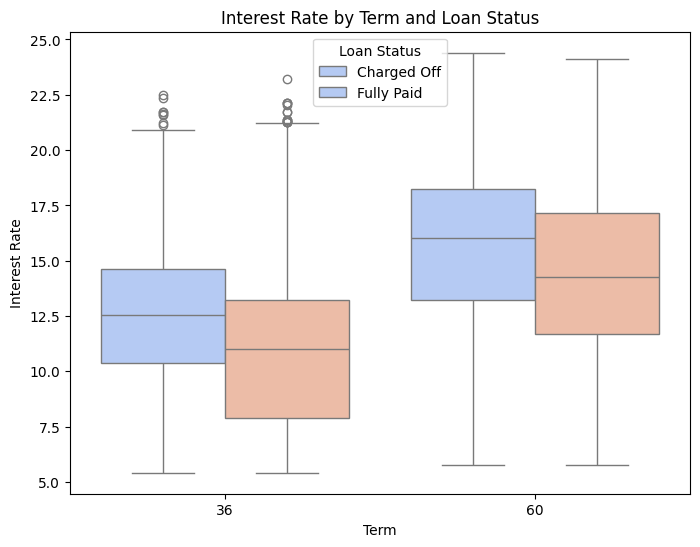

In [446]:
# Boxplot of interest rates grouped by loan status and term
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_latest, x='term', y='int_rate', hue='loan_status', palette='coolwarm')
plt.title('Interest Rate by Term and Loan Status')
plt.xlabel('Term')
plt.ylabel('Interest Rate')
plt.legend(['Charged Off', 'Fully Paid'], title='Loan Status')
plt.show()


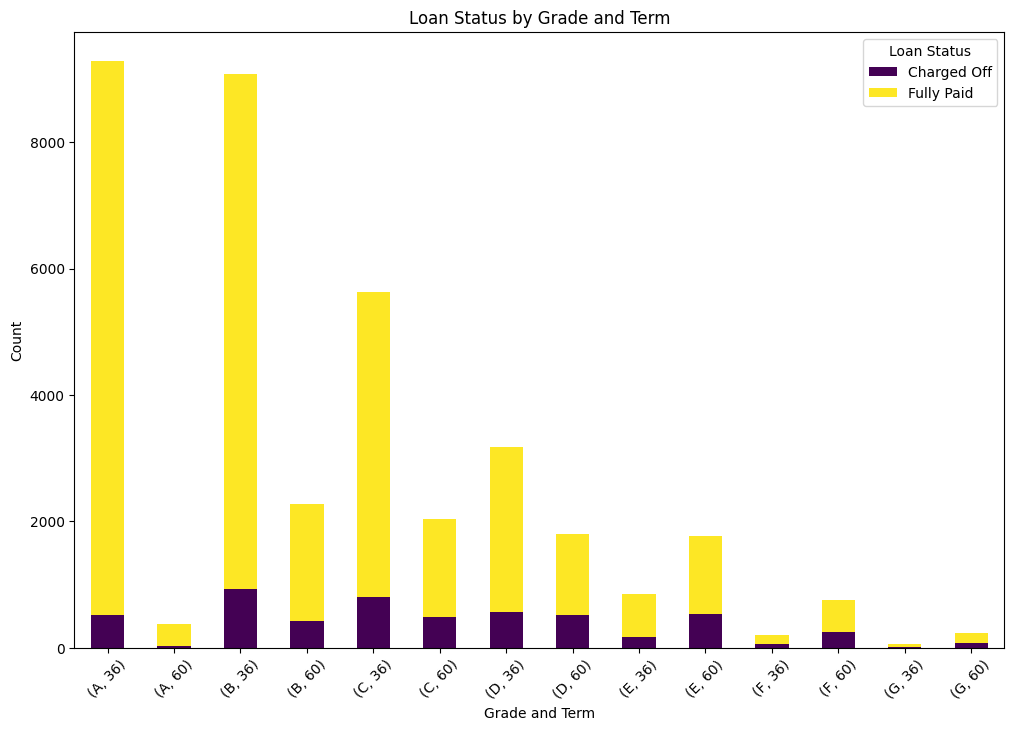

In [447]:
### Visualize relationships among multiple categorical variables, like grade, term, and loan_status

# Grouped bar chart for grade, term, and loan status
grouped_data = pd.crosstab([df_latest['grade'], df_latest['term']], df_latest['loan_status'])
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Loan Status by Grade and Term')
plt.xlabel('Grade and Term')
plt.ylabel('Count')
plt.legend(['Charged Off', 'Fully Paid'], title='Loan Status')
plt.xticks(rotation=45)
plt.show()


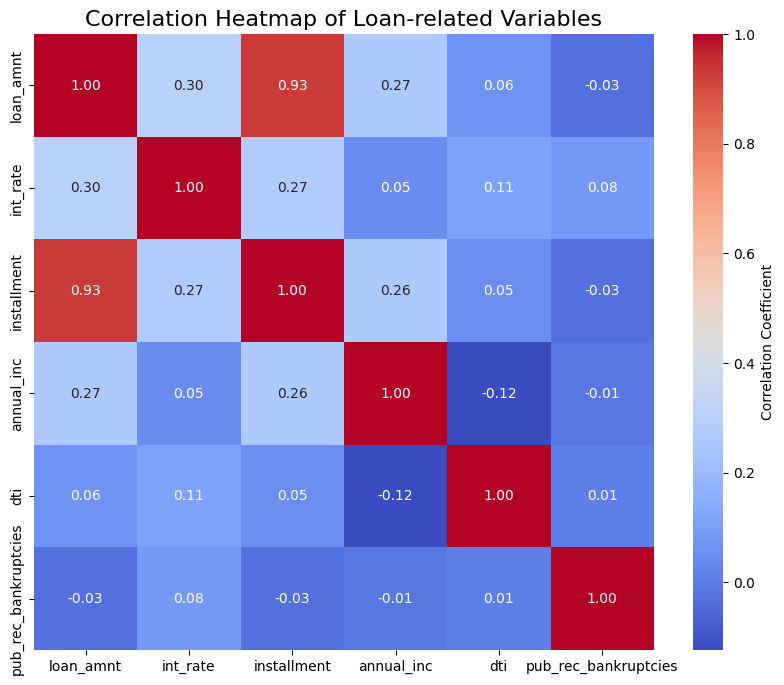

In [448]:
loan_related_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies']

df_loan_subset = df_latest[loan_related_vars]
# Compute the correlation matrix
correlation_matrix = df_loan_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})

# Add titles and labels
plt.title('Correlation Heatmap of Loan-related Variables', fontsize=16)
plt.show()

